In [135]:
import pandas as pd
import numpy as np
# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

In [136]:
# read the data set 
data_raw = pd.read_csv('ML3 data.csv')
data_raw.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,73560,8,2,1,9,NaN,3,3,1,119.000000,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957


In [137]:
data_desc = pd.read_excel('Data_Description.xlsx')
data_desc.head()

,Variable Name,Variable Description,Data File Name,Data File Description,Begin Year,EndYear,Component,Use Constraints
0,SEQN,Respondent sequence number.,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
1,SDDSRVYR,Data release cycle,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
2,RIDSTATR,Interview and examination status of the partic...,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
3,RIAGENDR,Gender of the participant.,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
4,RIDAGEYR,Age in years of the participant at the time of...,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN


In [138]:
data_raw.shape

(9813, 662)

In [139]:
print(data_raw.describe().T)
data_raw_desc = data_raw.describe().T

               count         mean         std          min          25%  \
SEQN     9813.000000 78644.559971 2938.592266 73557.000000 76092.000000   
SDDSRVYR 9813.000000     8.000000    0.000000     8.000000     8.000000   
RIDSTATR 9813.000000     2.000000    0.000000     2.000000     2.000000   
RIAGENDR 9813.000000     1.507694    0.499966     1.000000     1.000000   
RIDAGEYR 9813.000000    31.629573   24.397553     0.000000    10.000000   
...              ...          ...         ...          ...          ...   
ar21     9813.000000     0.516211    5.099966    -9.905405    -2.849344   
ar22     9813.000000     0.847771    7.074776    -9.646950    -8.087627   
ar23     9813.000000     0.436837    5.891879    -9.329935    -6.434927   
ar24     9813.000000    -2.754273    5.608956    -9.574369    -7.405031   
ar25     9813.000000     2.018194    4.114095    -9.877965    -0.326282   

                  50%          75%          max  
SEQN     78643.000000 81191.000000 83731.000000  

In [140]:
data_raw_desc.head()

,count,mean,std,min,25%,50%,75%,max
SEQN,9813.000000,78644.559971,2938.592266,73557.000000,76092.000000,78643.000000,81191.000000,83731.000000
SDDSRVYR,9813.000000,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000
RIDSTATR,9813.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
RIAGENDR,9813.000000,1.507694,0.499966,1.000000,1.000000,2.000000,2.000000,2.000000
RIDAGEYR,9813.000000,31.629573,24.397553,0.000000,10.000000,27.000000,52.000000,80.000000


In [141]:
print(data_raw.isnull().mean().sort_values(ascending = False))

DRQSDT5    1.000000
DRQSDT6    0.999592
DRQSDT12   0.999185
DRD370PQ   0.998981
DRD370JQ   0.998777
             ...   
WTMEC2YR   0.000000
SDMVPSU    0.000000
SDMVSTRA   0.000000
WTDRD1     0.000000
ar25       0.000000
Length: 662, dtype: float64


In [142]:
print(data_raw)

       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0     73557         8         2         1        69       NaN         4   
1     73558         8         2         1        54       NaN         3   
2     73559         8         2         1        72       NaN         3   
3     73560         8         2         1         9       NaN         3   
4     73561         8         2         2        73       NaN         3   
...     ...       ...       ...       ...       ...       ...       ...   
9808  83727         8         2         1        26       NaN         2   
9809  83728         8         2         2         2 24.000000         1   
9810  83729         8         2         2        42       NaN         4   
9811  83730         8         2         1         7       NaN         2   
9812  83731         8         2         1        11       NaN         5   

      RIDRETH3  RIDEXMON   RIDEXAGM  ...      ar16      ar17      ar18  \
0            4         1 

In [143]:
missing_percentage = data_raw.isnull().mean(axis=0) * 100

In [144]:
missing_percentage.sort_values(ascending=False)

DRQSDT5    100.000000
DRQSDT6     99.959238
DRQSDT12    99.918475
DRD370PQ    99.898094
DRD370JQ    99.877713
              ...    
WTMEC2YR     0.000000
SDMVPSU      0.000000
SDMVSTRA     0.000000
WTDRD1       0.000000
ar25         0.000000
Length: 662, dtype: float64

In [145]:
cols_gt_30 = data_raw.loc[:,missing_percentage >= 30]


In [146]:
#drop all the columns with missing data greater than 25%. 

data_new = data_raw.drop(columns=cols_gt_30)

In [147]:
data_new.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9809.000000,...,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,8.000000,2.000000,1.507694,31.629573,3.083766,3.277897,1.508509,1.219709,1.098787,...,-1.868362,-3.024976,0.103960,1.732914,-2.639643,0.516211,0.847771,0.436837,-2.754273,2.018194
std,2938.592266,0.000000,0.000000,0.499966,24.397553,1.262812,1.607957,0.499953,1.579601,0.344094,...,5.689419,5.572118,5.621485,4.612798,7.025533,5.099966,7.074776,5.891879,5.608956,4.114095
min,73557.000000,8.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-9.932773,-9.742275,-9.504686,-9.936065,-9.915099,-9.905405,-9.646950,-9.329935,-9.574369,-9.877965
25%,76092.000000,8.000000,2.000000,1.000000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,-7.164033,-8.291340,-6.029267,-1.014871,-9.200133,-2.849344,-8.087627,-6.434927,-7.405031,-0.326282
50%,78643.000000,8.000000,2.000000,2.000000,27.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,-3.237602,-4.672666,0.173614,1.830624,-5.338621,1.884456,0.814447,-0.763828,-4.263325,1.885457
75%,81191.000000,8.000000,2.000000,2.000000,52.000000,4.000000,4.000000,2.000000,1.000000,1.000000,...,1.883083,2.533461,5.417423,4.025792,1.521804,5.003854,8.079576,7.174353,1.071647,4.904403
max,83731.000000,8.000000,2.000000,2.000000,80.000000,5.000000,7.000000,2.000000,77.000000,9.000000,...,9.984094,10.010548,9.933308,9.580645,9.837051,9.202594,9.679657,8.967017,9.944636,8.362119


In [148]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 196 entries, SEQN to ar25
dtypes: float64(175), int64(21)
memory usage: 14.7 MB


In [149]:
data_new.select_dtypes(include=[float])

,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,DMDHRBR4,DMDHREDU,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,5.000000,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,...,-3.769219,-9.083129,-1.236402,-8.082373,-9.093733,3.688105,6.986431,-7.502831,-7.421791,-0.548241
9809,1.000000,1.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,1.000000,3.000000,...,-6.362523,6.958995,6.670261,-0.720513,-5.492617,-9.884320,0.798860,0.170989,-9.063173,1.373097
9810,1.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,2.000000,5.000000,...,-8.465361,2.550116,2.792637,1.830711,9.818446,-4.003013,8.856587,8.600473,6.149490,6.456003
9811,1.000000,1.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,2.000000,4.000000,...,-6.364351,6.946665,6.685305,-0.735745,-5.504608,-9.899777,0.805068,0.186107,-9.070253,1.389257


In [150]:
cols_ldd = data_desc[data_desc['Component'].isin(['Laboratory','Demographics','Dietary'])]["Variable Name"]

In [151]:
data_raw[cols_ldd].fillna(0)
data_raw.shape

(9813, 662)

In [152]:
try:
    data_raw.fillna(0)
except KeyError as e:
    print(f"KeyError: {e}. The column does not exist in the DataFrame.")

data_raw.shape

(9813, 662)

In [153]:
missing_percentage = data_raw.isnull().mean(axis=0) * 100
cols_gt_2_1 = data_raw.loc[:,missing_percentage >= 30]

In [154]:
data_raw_1 = data_raw.drop(columns = cols_gt_2_1)

In [155]:
try:
    data_new = data_new[cols_ldd].fillna(0)
except KeyError as e:
    print(f"KeyError: {e}. The column does not exist in the DataFrame.")

KeyError: "['RIDAGEMN', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'AIALANGA', 'DMDHSEDU', 'DBD100', 'DR1SKY', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DRD350A', 'DRD350AQ', 'DRD350B', 'DRD350BQ', 'DRD350C', 'DRD350CQ', 'DRD350D', 'DRD350DQ', 'DRD350E', 'DRD350EQ', 'DRD350F', 'DRD350FQ', 'DRD350G', 'DRD350GQ', 'DRD350H', 'DRD350HQ', 'DRD350I', 'DRD350IQ', 'DRD350J', 'DRD350JQ', 'DRD350K', 'DRD370A', 'DRD370AQ', 'DRD370B', 'DRD370BQ', 'DRD370C', 'DRD370CQ', 'DRD370D', 'DRD370DQ', 'DRD370E', 'DRD370EQ', 'DRD370F', 'DRD370FQ', 'DRD370G', 'DRD370GQ', 'DRD370H', 'DRD370HQ', 'DRD370I', 'DRD370IQ', 'DRD370J', 'DRD370JQ', 'DRD370K', 'DRD370KQ', 'DRD370L', 'DRD370LQ', 'DRD370M', 'DRD370MQ', 'DRD370N', 'DRD370NQ', 'DRD370O', 'DRD370OQ', 'DRD370P', 'DRD370PQ', 'DRD370Q', 'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T', '

In [156]:
data_new.shape

(9813, 196)

In [157]:
data_new.fillna(0)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,4,4,1,1,1.000000,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,3,3,1,1,1.000000,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,73559,8,2,1,72,3,3,2,1,1.000000,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,73560,8,2,1,9,3,3,1,1,1.000000,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,73561,8,2,2,73,3,3,1,1,1.000000,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,8,2,1,26,2,2,2,1,1.000000,...,-3.769219,-9.083129,-1.236402,-8.082373,-9.093733,3.688105,6.986431,-7.502831,-7.421791,-0.548241
9809,83728,8,2,2,2,1,1,2,1,1.000000,...,-6.362523,6.958995,6.670261,-0.720513,-5.492617,-9.884320,0.798860,0.170989,-9.063173,1.373097
9810,83729,8,2,2,42,4,4,2,2,1.000000,...,-8.465361,2.550116,2.792637,1.830711,9.818446,-4.003013,8.856587,8.600473,6.149490,6.456003
9811,83730,8,2,1,7,2,2,1,1,1.000000,...,-6.364351,6.946665,6.685305,-0.735745,-5.504608,-9.899777,0.805068,0.186107,-9.070253,1.389257


In [158]:
data_new.isna().sum().sort_values(ascending = False)

URDFLOW1    2663
MIALANG     2502
MIAPROXY    2501
MIAINTRP    2500
LBXTTG      2236
            ... 
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
WTDRD1         0
ar25           0
Length: 196, dtype: int64

In [159]:
data_new = data_new.fillna(0)
data_raw_1 = data_raw_1.fillna(0)

In [160]:
data_new.isna().sum().sort_values(ascending = False)


SEQN        0
DRD360      0
URXUMS      0
URXUCR.x    0
URXCRS      0
           ..
DR1TBCAR    0
DR1TCRYP    0
DR1TLYCO    0
DR1TLZ      0
ar25        0
Length: 196, dtype: int64

In [161]:
data_raw_1.isna().sum().sort_values(ascending = False)

SEQN        0
DRD360      0
URXUMS      0
URXUCR.x    0
URXCRS      0
           ..
DR1TBCAR    0
DR1TCRYP    0
DR1TLYCO    0
DR1TLZ      0
ar25        0
Length: 196, dtype: int64

In [162]:
insignificant_col = []

for col in data_new.columns:
    if data_new[col].value_counts(normalize = True).count() <= 1:
        insignificant_col.append(col)

print(insignificant_col)

['SDDSRVYR', 'RIDSTATR']


In [163]:
data_new = data_new.drop(columns=insignificant_col)

In [164]:
data_new.shape

(9813, 194)

In [165]:
data_raw_1.shape

(9813, 196)

In [166]:
data_raw_1['DR1TBCAR']

0       304.000000
1       145.000000
2       449.000000
3       237.000000
4      1476.000000
           ...    
9808   1068.000000
9809   1387.000000
9810   5648.000000
9811      0.000000
9812    604.000000
Name: DR1TBCAR, Length: 9813, dtype: float64

In [167]:
insignificant_col = []

for col in data_raw.columns:
    try:
        if data_raw[col].value_counts(normalize = True).count() <= 1:
            insignificant_col.append(col)
    except Exception as e:
        print(f"KeyError: {e}. The column does not exist in the DataFrame.")

print(insignificant_col)
data_raw = data_raw.drop(columns=insignificant_col)
data_raw.shape


['SDDSRVYR', 'RIDSTATR', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DRD350K', 'DRD370V', 'URDP02LC', 'LBDBPBLC', 'LBDBSELC', 'LBDBMNLC', 'URDUCSLC', 'URDUMOLC']


(9813, 639)

In [168]:
str_1 = data_raw.dtypes
print(str_1)

SEQN          int64
RIAGENDR      int64
RIDAGEYR      int64
RIDAGEMN    float64
RIDRETH1      int64
             ...   
ar21        float64
ar22        float64
ar23        float64
ar24        float64
ar25        float64
Length: 639, dtype: object


In [169]:
data_raw = data_raw.fillna(0)

In [170]:
from sklearn.preprocessing import MinMaxScaler
# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
ms = MinMaxScaler()
X_std = ms.fit_transform(data_raw)
X_std.shape

(9813, 639)

Optimal number of clusters: 2


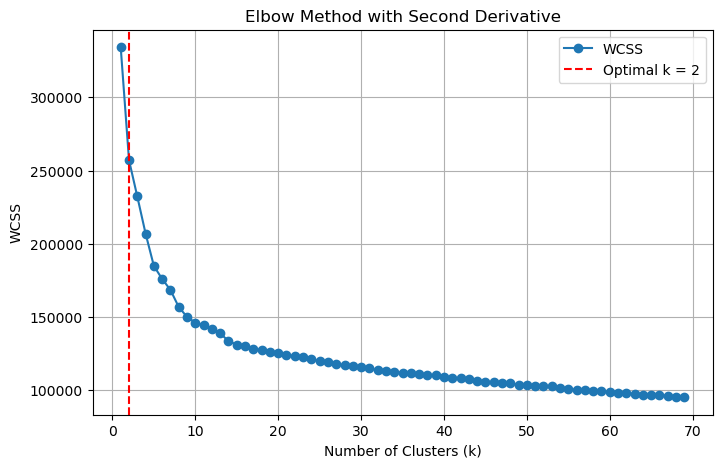

In [171]:
k = int(np.sqrt(X_std.shape[0]/2))
#k = 30
wcss = []
for i in range(1,k):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

#print(wcss)

wcss_diff = np.diff(wcss)  # First derivative
#print(wcss_diff)
wcss_diff_rate = np.diff(wcss_diff)  # Second derivative
#print(wcss_diff_rate)
# Optimal k is where the second derivative is maximum
optimal_k = np.argmax(np.abs(wcss_diff_rate))  +2  # +2 to align with range_k
print(f"Optimal number of clusters: {optimal_k}")


# Plot WCSS and highlight the optimal k
plt.figure(figsize=(8, 5))
plt.plot(range(1,k), wcss, marker='o', label='WCSS')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method with Second Derivative')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
from kneed import KneeLocator


Optimal number of clusters: 14


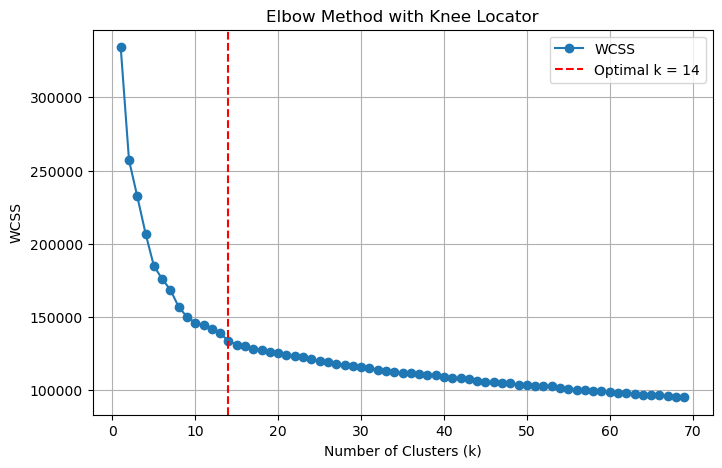

In [173]:
from kneed import KneeLocator

# WCSS for different k values
range_k = range(1, k)
wcss = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

# Find the knee point
kneedle = KneeLocator(range_k, wcss, curve="convex", direction="decreasing")
optimal_k = kneedle.knee
print(f"Optimal number of clusters: {optimal_k}")

# Plot the elbow with the knee point
plt.figure(figsize=(8, 5))
plt.plot(range_k, wcss, marker='o', label='WCSS')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method with Knee Locator')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

In [174]:
plt.rcParams['figure.figsize'] = [15,8]

In [207]:
# create a list for different values of K
n_clusters = range(2,15)

silhouette_scores = []
# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for i in n_clusters:
    cluster = KMeans (n_clusters= i, random_state= 42)
    cluster.fit(X_std)
    #silhouette_scores.append(silhouette_score(X_std, labels))
    #score = silhouette_score(X_std, predict, random_state= 10)
    #print ("For {} clusters the silhouette score is {})".format(i, score))
    labels = cluster.labels_
    silhouette_scores.append(silhouette_score(X_std, labels))

print(silhouette_scores)
# Optimal k
optimal_k = n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

[0.21731902028550668, 0.22835035363060696, 0.20772755639767482, 0.20585218739489125, 0.1555051270889882, 0.1869716407018608, 0.18867919219131535, 0.19088769575685868, 0.18184697356461535, 0.1740812827972044, 0.15876761438308268, 0.16153679375862828, 0.15628606596321237]
Optimal number of clusters: 3


Average Silhoutte Score :  0.21731902028550668
Average Silhoutte Score :  0.22835035363060696
Average Silhoutte Score :  0.20772755639767482
Average Silhoutte Score :  0.20585218739489125
Average Silhoutte Score :  0.1555051270889882
Average Silhoutte Score :  0.1869716407018608
Average Silhoutte Score :  0.18867919219131535
Average Silhoutte Score :  0.19088769575685868


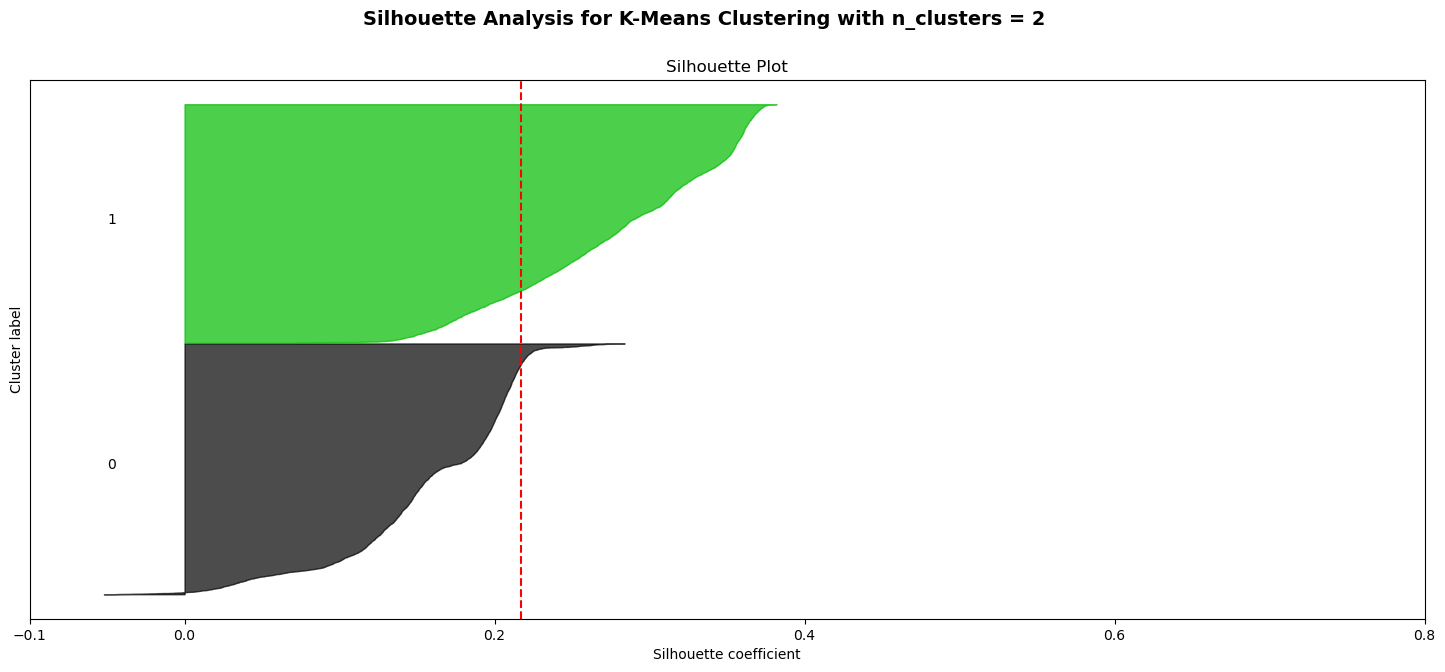

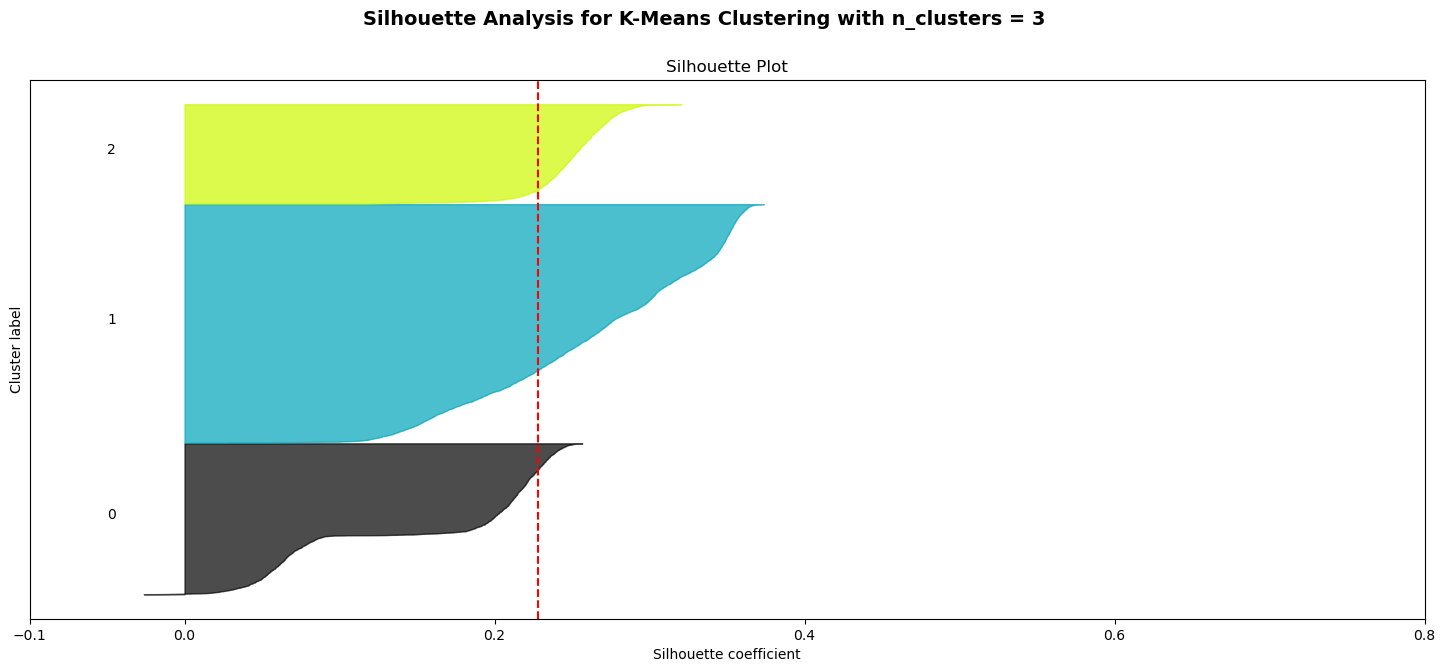

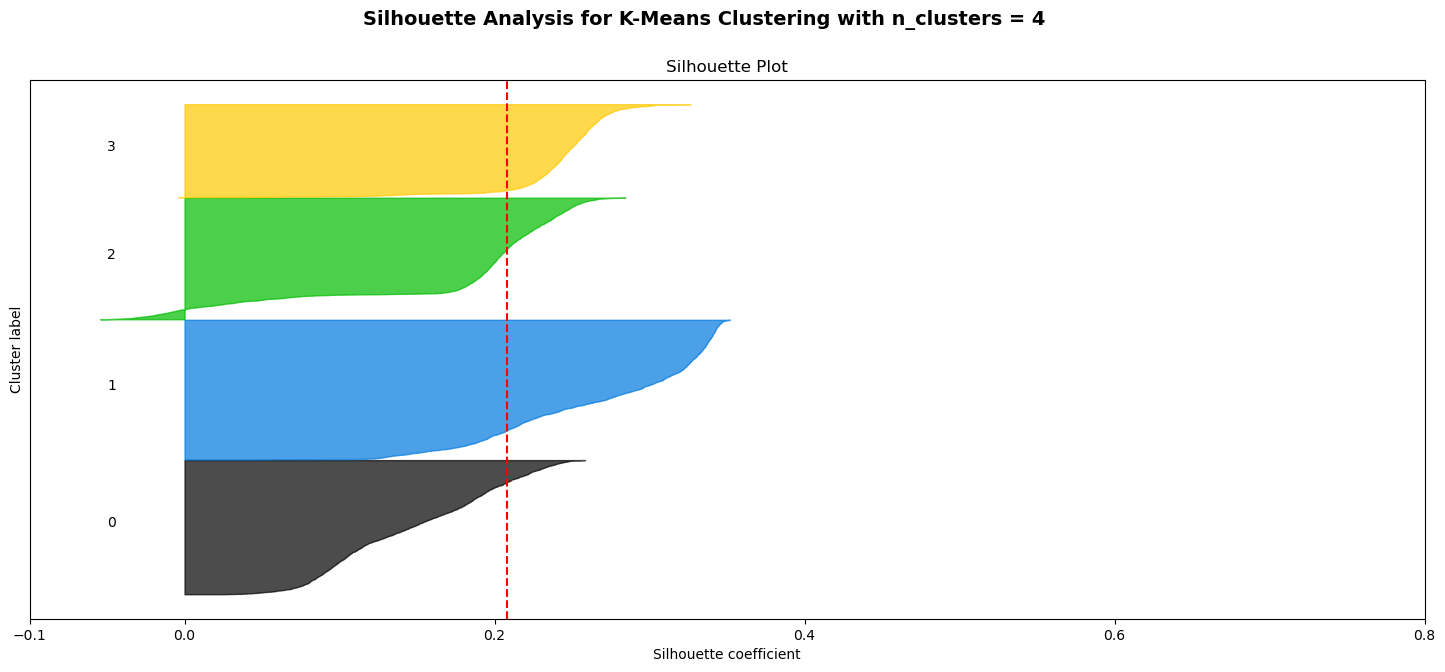

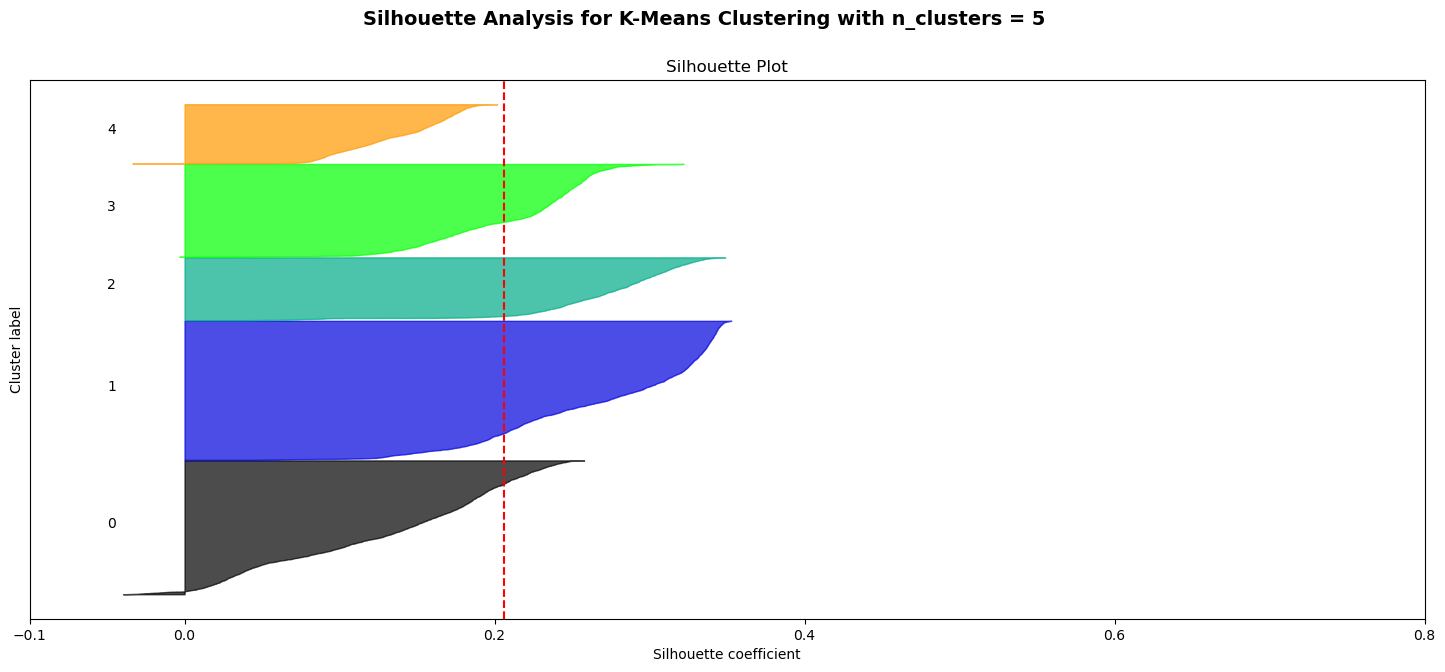

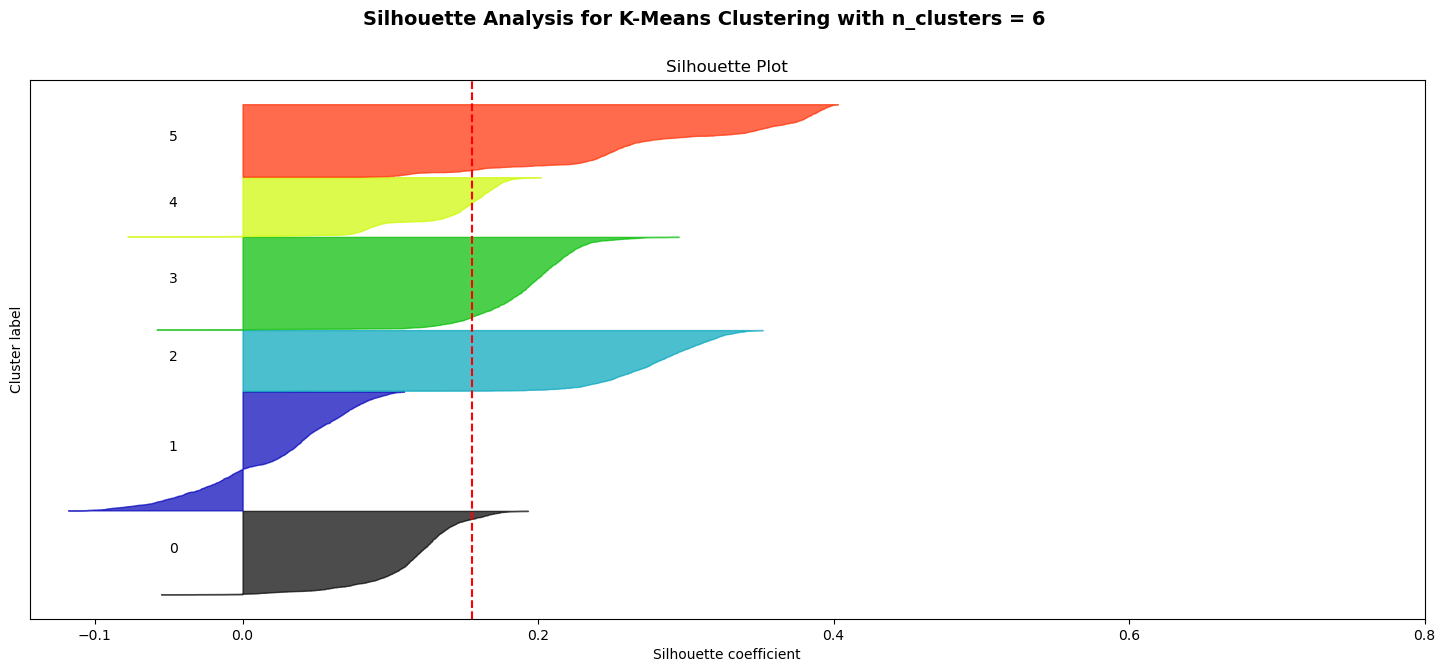

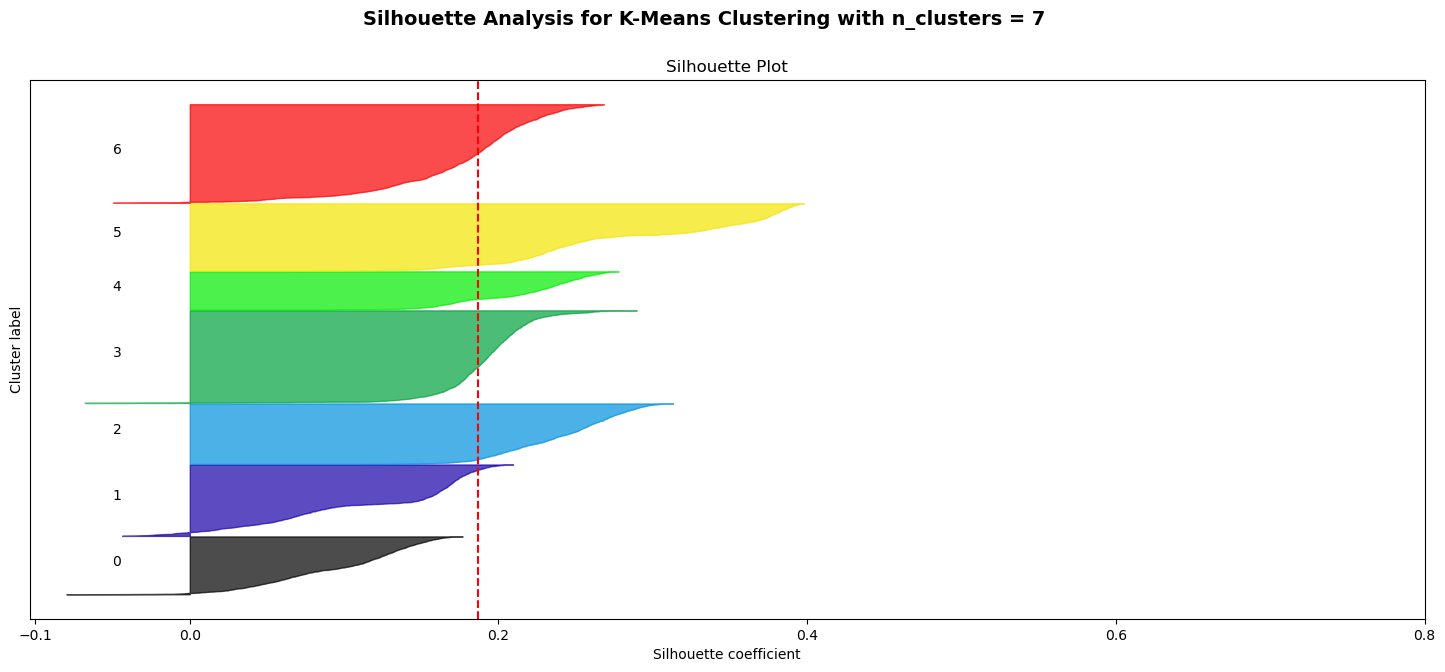

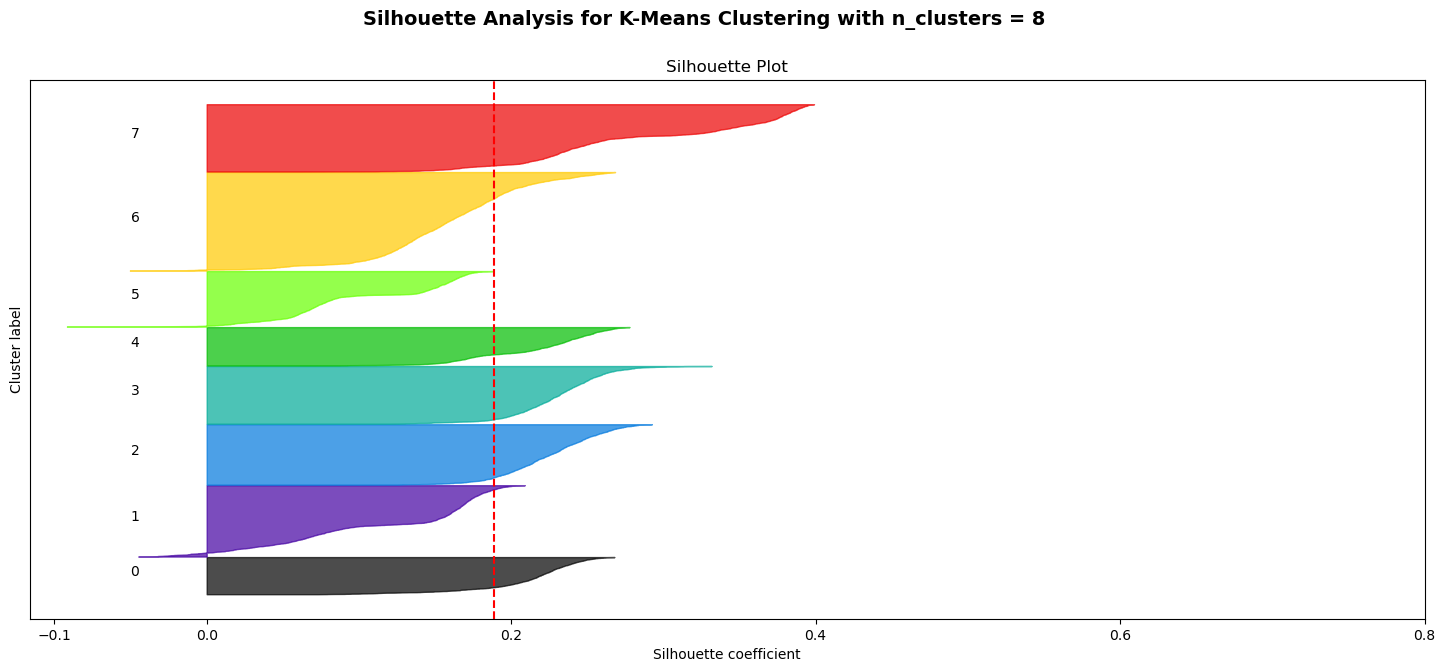

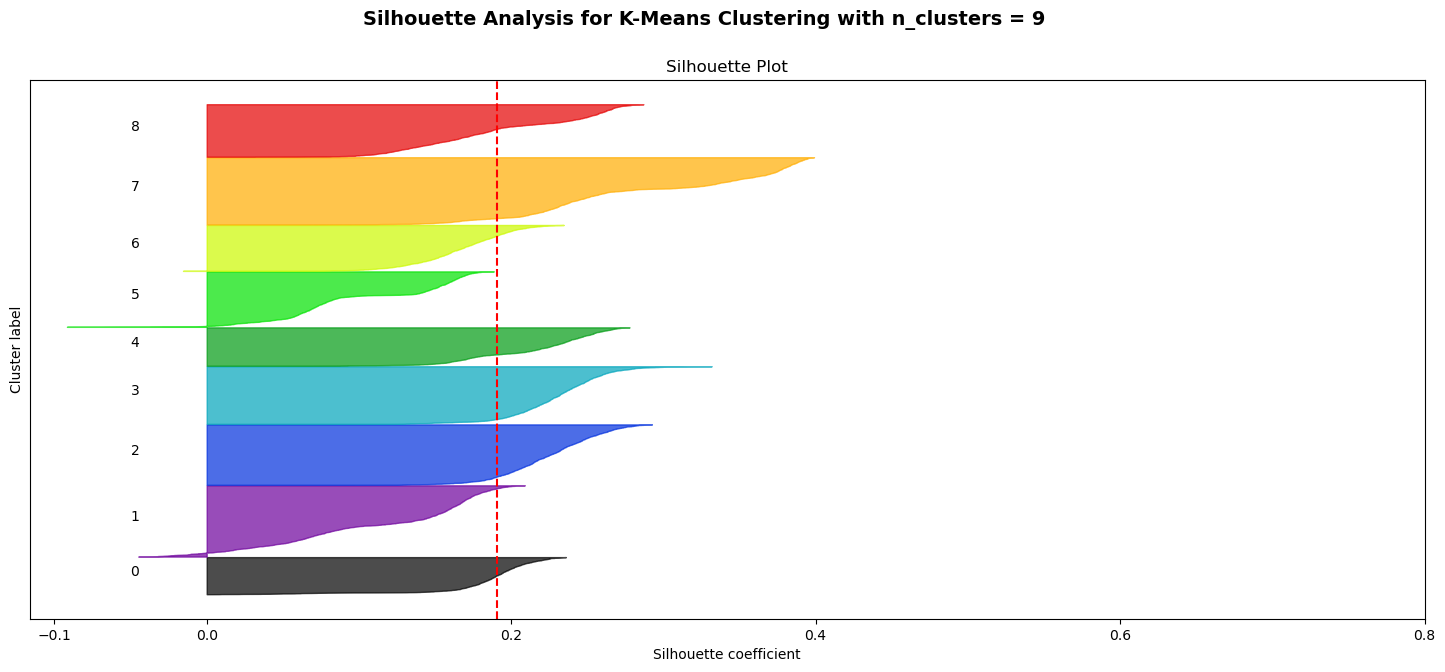

In [206]:
# consider the number of clusters
n_clusters = range(2,10)

# consider an array of the data
X = np.array(X_std)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 42)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X_std)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X_std, cluster_labels)

    print("Average Silhoutte Score : ", silhouette_avg)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
   # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    #centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    #for i, c in enumerate(centers):
     #   ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    #ax2.set_title("Clusters")
    #ax2.set_xlabel("Spending Score")
    #ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

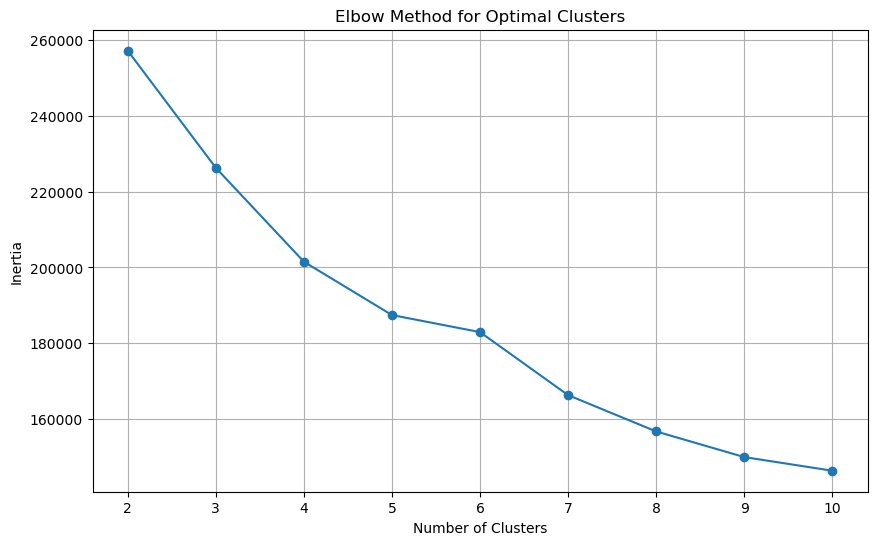

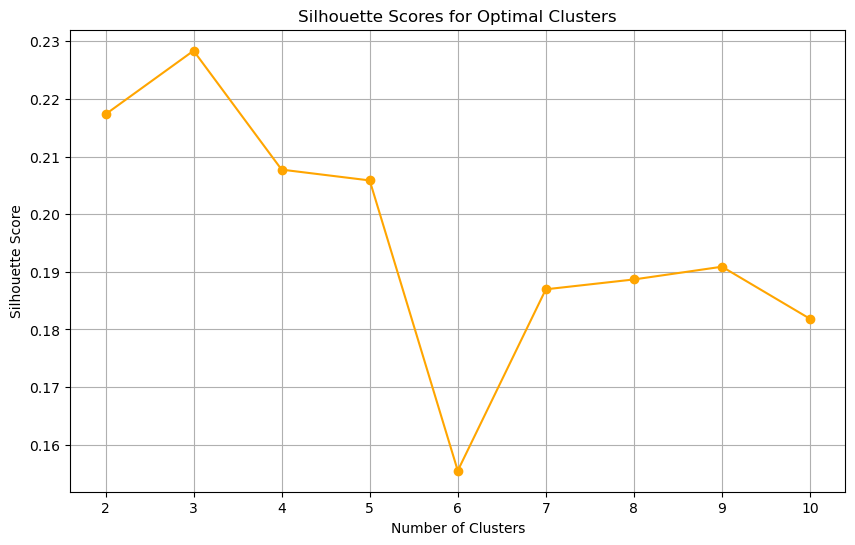

In [177]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Determine the optimal number of clusters using the elbow method and silhouette scores
range_n_clusters = range(2, 11)  # Testing clusters from 2 to 10
inertia = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_std)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_std, cluster_labels))

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


In [ ]:

# Applying KMeans with the optimal number of clusters (e.g., 4)
optimal_clusters = 3  # Based on elbow/silhouette analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_std)
print(cluster_labels)

X_std_unscaled = ms.inverse_transform(X_std)
data_raw['Clusters'] = cluster_labels



[0 0 1 ... 2 1 1]


In [211]:
# Correlation analysis: Analyzing features' correlation with cluster labels
correlations = data_raw.corr()['Cluster'].sort_values(ascending=False)

# Display the top 10 most correlated features with the cluster labels
correlations.head(20)


Clusters   1.000000
Cluster    1.000000
LBDR64.y   0.788362
LBDR26.y   0.788174
LBDR69.y   0.788112
LBDR11.y   0.788049
LBDRPI.y   0.787737
LBDR33.y   0.787612
LBDR40.y   0.787550
LBDR71.y   0.787363
LBDR06.y   0.787114
LBDR82.y   0.787114
LBDR67.y   0.786990
LBDR35.y   0.786493
LBDR72.y   0.786430
LBDR31.y   0.786368
LBDR58.y   0.786368
LBDR18.y   0.786306
LBDR68.y   0.786182
LBDR70.y   0.785934
Name: Cluster, dtype: float64

In [ ]:
from sklearn.decomposition import PCA

# Performing PCA to retain 95% of the variance
pca_95 = PCA(n_components=.95, random_state=42)
pca_95_components = pca_95.fit_transform(X_std)

# Number of components retained to explain 95% of variance
num_components_95 = pca_95.n_components_

# Explained variance ratio
explained_variance_ratio = pca_95.explained_variance_ratio_

num_components_95, sum(explained_variance_ratio)



[[ 0.09870361 -2.64004708 -0.22553503 ... -0.00708958  0.09389905
   0.01408316]
 [ 3.61866801  1.39732336 -2.96646757 ...  0.11593311 -0.06160966
   0.14420813]
 [-1.82417284 -0.32280307 -0.20422157 ...  0.29360189  0.22381753
  -0.13538297]
 ...
 [ 3.74059248  0.91602965  3.15916567 ... -0.41708308  0.26374943
  -0.15843491]
 [-3.98557537 -1.11766753 -0.09191696 ...  0.01484793  0.03349854
  -0.08553922]
 [-4.22585767 -0.87072351 -0.12755571 ... -0.06514981 -0.06220466
  -0.17161781]]


In [245]:


# Applying KMeans with the optimal number of clusters (e.g., 4)
optimal_clusters = 3  # Based on elbow/silhouette analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_std)
print(cluster_labels)

# Adding cluster labels to the data for analysis
#X_std['Cluster'] = cluster_labels
data_raw['Cluster'] = cluster_labels
# Perform PCA to reduce dimensions for visualization (2 components for scatter plot)
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_std)

# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

unique_clusters = set(cluster_labels)

# Scatter plot of PCA results
plt.figure(figsize=(10, 6))
for cluster in range (unique_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title("KMeans Clustering with PCA (2D Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


[0 0 1 ... 2 1 1]


TypeError: 'set' object cannot be interpreted as an integer

<Figure size 1000x600 with 0 Axes>

In [246]:
# Perform PCA to retain 95% of the variance
pca_95 = PCA(n_components=0.95, random_state=42)
pca_95_components = pca_95.fit_transform(X_std)

# Number of components retained
num_components_95 = pca_95.n_components_

# Apply KMeans clustering on PCA-reduced data
kmeans_pca_95 = KMeans(n_clusters=4, random_state=42)
clusters_pca_95 = kmeans_pca_95.fit_predict(pca_95_components)

unq_labels = set(clusters_pca_95)

# Creating a scatter plot using the first two principal components
plt.figure(figsize=(10, 6))
for cluster in clusters_pca_95:
    cluster_data = pca_95_components[clusters_pca_95 == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title("KMeans Clustering on PCA-Reduced Data (95% Variance Retained)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

num_components_95
explained_variance_ratio = pca_95.explained_variance_ratio_

num_components_95, sum(explained_variance_ratio)


: 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}


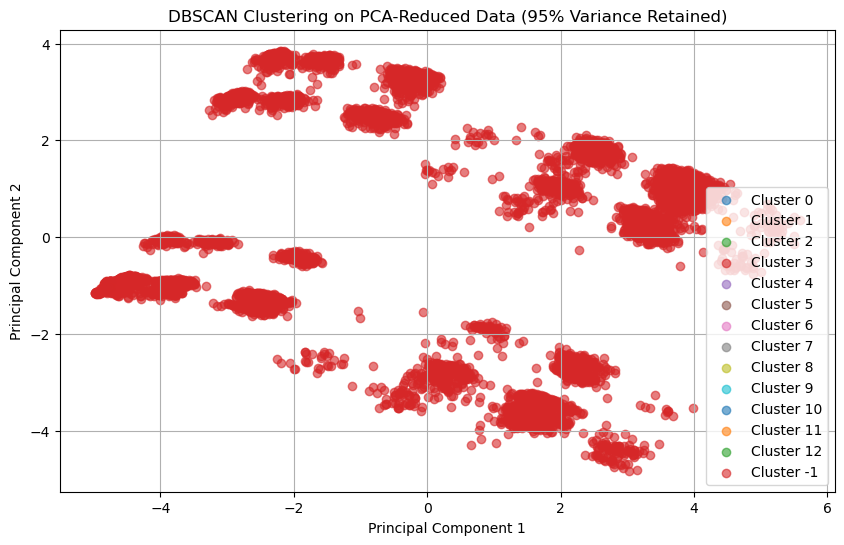

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.95)
dbscan_labels = dbscan.fit_predict(pca_95_components)

# Scatter plot for DBSCAN clustering
plt.figure(figsize=(10, 6))
unique_clusters = set(dbscan_labels)
print(unique_clusters)
for cluster in unique_clusters:
    cluster_data = pca_95_components[dbscan_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title("DBSCAN Clustering on PCA-Reduced Data (95% Variance Retained)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()



Labels {0, 1, 2, 3, 4, 5, 6, -1}


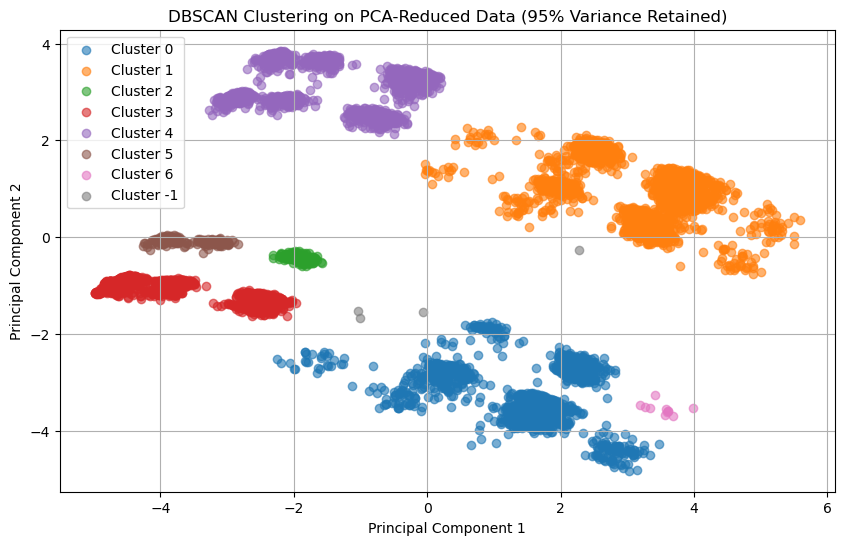

In [ ]:
# Applying PCA to reduce dimensions for clustering
pca = PCA(n_components=.95, random_state=42)
pca_components = pca.fit_transform(X_std)
pca_df = pd.DataFrame(pca_components)

print(pca_components.)

# Applying DBSCAN on PCA-reduced data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_components)

# Adding DBSCAN cluster labels to the PCA DataFrame
pca_df['DBSCAN_Cluster'] = dbscan_labels

# Scatter plot for DBSCAN clustering
plt.figure(figsize=(10, 6))
unique_clusters = set(dbscan_labels)
print('Labels',unique_clusters)
for cluster in unique_clusters:
    cluster_data = pca_components[dbscan_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title("DBSCAN Clustering on PCA-Reduced Data (95% Variance Retained)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()



Labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}


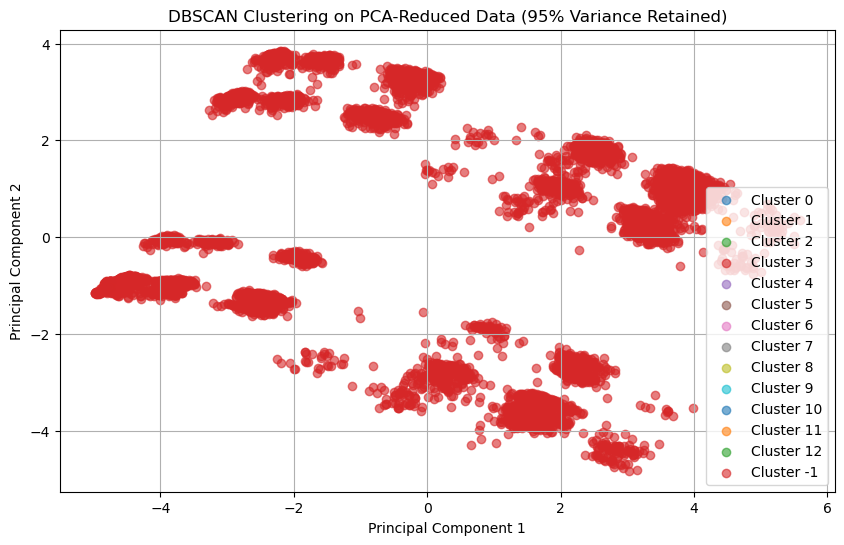

(77, 0.9504957494709946)

In [241]:
# Perform PCA to retain 95% of the variance
pca_95 = PCA(n_components=0.95, random_state=42)
pca_95_components = pca_95.fit_transform(X_std)

# Number of components retained
num_components_95 = pca_95.n_components_
# Applying DBSCAN on PCA-reduced data
dbscan = DBSCAN(eps=0.95, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_95_components)

# Adding DBSCAN cluster labels to the PCA DataFrame
pca_df['DBSCAN_Cluster'] = dbscan_labels

# Scatter plot for DBSCAN clustering
plt.figure(figsize=(10, 6))
unique_clusters = set(dbscan_labels)
print('Labels',unique_clusters)
for cluster in unique_clusters:
    cluster_data = pca_95_components[dbscan_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title("DBSCAN Clustering on PCA-Reduced Data (95% Variance Retained)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

num_components_95
explained_variance_ratio = pca_95.explained_variance_ratio_

num_components_95, sum(explained_variance_ratio)
